In [ ]:
import cv2
path = r"C:\Users\DELL\Downloads\Fed2.jpg"
img=cv2.imread(path) 
h,w=img.shape[:2]
#image slicing using two parameters(height,width and chances)
print(h,w)
#30%(0.3) of height and 100%(1) width
#syntax[height:height, width:width]
#round for cropping or rounding off the image
img1=img[0:round(0.3*h), 0:w]
h,w=img1.shape[:2]
print(h,w)
#writes the cropped image into the below folder
cv2.imwrite(r"C:\Users\91910\Downloads\images_sharing\cropped\img1.jpg",img1)

In [1]:
import tensorflow

In [2]:
import dlib

ModuleNotFoundError: No module named 'dlib'

In [ ]:
#masking 
import numpy as np
#image is converted to hsv-hue,saturation,value module
path = r"C:\Users\91910\Downloads\images_sharing\images_sharing\candle.jpg"
img=cv2.imread(path) 
#hsv - seperates image luminance from color of the image which cannot be seperated by BGR
hsv=cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
#gives range of the hue
lower=np.array([0,0,100],dtype="uint8")
upper=np.array([40,200,255],dtype="uint8")
mask=cv2.inRange(hsv, lower, upper)
#bitwise - anding mask and image
out=cv2.bitwise_and(img,img,mask=mask)
cv2.imwrite(r"C:\Users\91910\Downloads\images_sharing\cropped\candle1.jpg",out)

In [ ]:
#filtering
path = r"C:\Users\91910\Downloads\images_sharing\images_sharing\Fed1.png"
img=cv2.imread(path)
#for dark color increase 48 to 70,....
#for light color decrease 
#either increase all the values or decrease all of them
#its like multiplying top to bottom or from left to right
kernel1=np.array([[-6,-6,-6],[-6,49,-6],[-6,-6,-6]])
#summation of all the values must give zero
kernel2=np.array([[0,3,6],[-3,0,3],[-6,-3,0]])
#src - source image
#ddepth - least value of source and output image should be same
out1=cv2.filter2D(src=img,ddepth=-1,kernel=kernel2)
cv2.imwrite(r"C:\Users\91910\Downloads\images_sharing\cropped\out1.jpg",out1)

In [ ]:
#histogram equalization
#0-black and 255-white in histogram
path = r"C:\Users\91910\Downloads\images_sharing\images_sharing\landscape_image.jpg"
img=cv2.imread(path)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cv2.imwrite(r"C:\Users\91910\Downloads\images_sharing\cropped\gray.jpg",gray)
out_hist = cv2.equalizeHist(gray)
cv2.imwrite(r"C:\Users\91910\Downloads\images_sharing\cropped\hist.jpg",out_hist)

In [ ]:
#thresholding - partitioning image into foreground and background
img=cv2.imread(r"C:\Users\91910\Downloads\images_sharing\images_sharing\landscape_image.jpg")
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#cv2.THRESH_BINARY | cv2.THRESH_OTSU combines the binary thresholding operation with the Otsu's method to automatically determine the threshold value for image binarization.
#image binarization - image is converted into a binary image, consisting of only two colors (usually black and white)
detected_output = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
cv2.imwrite(r"C:\Users\91910\Downloads\images_sharing\cropped\thresh.png", detected_output)

In [ ]:
import cv2

# Load the image
image = cv2.imread(r"C:\Users\91910\Downloads\images_sharing\images_sharing\coins.jpg")

# Convert to HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define lower and upper bounds for copper color in HSV
lower_bound = (0, 100, 100)
upper_bound = (20, 255, 255)

# Create a mask for copper-colored coins
mask = cv2.inRange(hsv_image, lower_bound, upper_bound)

# Find contours in the mask
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image
cv2.drawContours(image, contours, -1, (0, 255, 0), 2)

# Count the number of copper-colored coins
copper_coin_count = len(contours)

# Print the count of copper-colored coins
print("Number of copper-colored coins:", copper_coin_count)
cv2.imwrite(r"C:\Users\91910\Downloads\images_sharing\cropped\coin1.jpg",image)

# Day 2

In [ ]:
#wavelet transform
import pywt
import cv2
import numpy as np
import pywt

#Define function for wavelet transform 
def w2d(img, mode, level):
    imArray=img
    imArray=cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)
    imArray=np.float32(imArray)
    #imArray/=255
    #db4- wavelet
    #mode - there are many modes
    #wavedec - divides or decomposes image into 4 parts
    coeffs=pywt.wavedec2(imArray, 'db4', mode, level=level)
    coeffs_H=list(coeffs)
    #coeffs_H[0]*=0 - low frequency
    #waverec - combines the 4 parts
    imArray_H=pywt.waverec2(coeffs_H, 'db4', mode)
    imArray_H*=255
    imArray_H=np.uint8(imArray_H)
    return coeffs

input_img = cv2.imread(r"C:\Users\91910\Downloads\information_sharing\information_sharing\Fed2.jpg")
im_har=w2d(input_img, mode='sym', level=4)
#im_har[1] is basically needed
#im_har[1][0] is for horizontal
cv2.imwrite(r'C:\Users\91910\Downloads\images_sharing\cropped\wavelet1.jpg', im_har[1][0])
#im_har[1][1] is for vertical
cv2.imwrite(r'C:\Users\91910\Downloads\images_sharing\cropped\wavelet2.jpg', im_har[1][1])
#im_har[1][2] is for diagonal
cv2.imwrite(r'C:\Users\91910\Downloads\images_sharing\cropped\wavelet3.jpg', im_har[1][2])

In [ ]:
#haar cascade
import cv2
import numpy as np

#Need to download the xml files for face and eye detection
face_cascade=cv2.CascadeClassifier(r'C:\Users\91910\anaconda3\Lib\site-packages\cv2\data\haarcascade_frontalface_default.xml')
eye_cascade=cv2.CascadeClassifier(r'C:\Users\91910\anaconda3\Lib\site-packages\cv2\data\haarcascade_eye.xml')

#Function for getting cropped faces if eyes and face detected
def get_cropped_image(image_path):
    img=cv2.imread(image_path)
    gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes)>=2:
            return roi_color

roi_color = get_cropped_image(r"C:\Users\91910\Downloads\information_sharing\information_sharing\Fed1.png")
cv2.imwrite(r'C:\Users\91910\Downloads\images_sharing\cropped\haar.jpg', roi_color)

In [ ]:
#local binary pattern
from skimage.feature import local_binary_pattern
import cv2
import numpy as np

image1 = cv2.imread(r"C:\Users\91910\Downloads\information_sharing\information_sharing\Fed1.png")
image2 = cv2.imread(r"C:\Users\91910\Downloads\information_sharing\information_sharing\Fed2.jpg")
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
#72 - number of points given to lbp in circle, 18 - radius of the circle
lbp1 = local_binary_pattern(gray1, 72, 18,method='uniform')
lbp2 = local_binary_pattern(gray2, 82, 32,method='uniform')
cv2.imwrite(r'C:\Users\91910\Downloads\images_sharing\cropped\lbp1.jpg',lbp1)
cv2.imwrite(r'C:\Users\91910\Downloads\images_sharing\cropped\lbp2.jpg',lbp2)

In [ ]:
#face detection
from sklearn.svm import LinearSVC
import cv2
import os
import numpy as np
from skimage import feature

def describe(image, numPoints, radius):
    #lbp converts image pixels to number
    # compute the Local Binary Pattern representation of the image, and then use the LBP representation to build the histogram of patterns
    lbp = feature.local_binary_pattern(image, numPoints, radius, method="uniform")
    #bins - no of pixels
    #ravel - returns a flattened array [flattens multi-dimensional to 1D array]
    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, numPoints + 3), range=(0, numPoints + 2))
    # normalize the histogram
    #histogram - no of bins in a particular range
    hist = hist.astype("float")
    eps=1e-7 
    #gives more accuracy
    hist /= (hist.sum() + eps)
    # return the histogram of Local Binary Patterns
    return hist
    
data = [];labels = []
numPoints=24 ; radius=8
path="C:/Users/91910/Downloads/information_sharing/information_sharing/classes/"
allfiles=os.listdir(path)
for imagePath in allfiles:
# load the image, convert it to grayscale, and describe it
    fs=os.listdir(path+imagePath+"/")
    for ext in fs:
        image = cv2.imread(path+imagePath+"/"+ext)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        hist = describe(gray, numPoints, radius)
# extract the label from the image path, then update the
# label and data lists
        labels.append(imagePath)
        data.append(hist)
        
# train a Linear SVM on the data
model = LinearSVC(C=100.0, random_state=42) # C-margin [grid search must be used]
model.fit(data, labels)

#Inferencing on test images
path1="C:/Users/91910/Downloads/classes/classes/tests/"
allfiles=os.listdir(path1)
for imagePath in allfiles:
# load the image, convert it to grayscale, describe it,and classify it
    image = cv2.imread(path1+imagePath)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hist = describe(gray, numPoints, radius)
    prediction = model.predict(hist.reshape(1, -1))
# display the image and the prediction
    image = cv2.putText(image, prediction[0], (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 0, 255), 3)
cv2.imwrite(path+imagePath, image)

In [ ]:
import tensorflow as tf
model=tf.keras.Sequential([tf.keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss='mean_squared_error')
import numpy as np
x=np.array([0, 2, 4, 6, 8], dtype=int)
y=np.array([29, 25, 22, 20, 19], dtype=float)
model.fit(x,y,epochs=500)
print(model.predict([11]))
print(-1.25*11 + 28)
model = tf.keras.models.Sequential([
 tf.keras.layers.Conv2D(16, (3,3), activation='relu' ,
 input_shape=(300, 300, 3)),
 tf.keras.layers.MaxPooling2D(2, 2),
 tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
 tf.keras.layers.MaxPooling2D(2,2),
 tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
 tf.keras.layers.MaxPooling2D(2,2),
 tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
 tf.keras.layers.MaxPooling2D(2,2),
 tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
 tf.keras.layers.MaxPooling2D(2,2),
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(512, activation='relu'),
 tf.keras.layers.Dense(1, activation='sigmoid')
])
print(model.summary())

In [ ]:
# import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
details = pd.read_csv("C:/Users/mdzai/Downloads/day3_information/day3_information/diabetes.csv", header=None, names=col_names)
details.head()
details.drop(0,axis=0,inplace=True)
feature_cols=['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
y=details.label
X=details[feature_cols]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
scaler = preprocessing.StandardScaler().fit(X_test)
X_test_scaled = scaler.transform(X_test)
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=16)
logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test_scaled)
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
from matplotlib import pyplot as plt
from sklearn import metrics
y_pred_proba = logreg.predict_proba(X_test_scaled)[::,1]
auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc
# save the model to disk
import pickle
filename = 'E:/logregmodel.sav'
pickle.dump(logreg, open(filename, 'wb'))
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test_scaled, y_test)
print(result)

# Day 4

<Axes: >

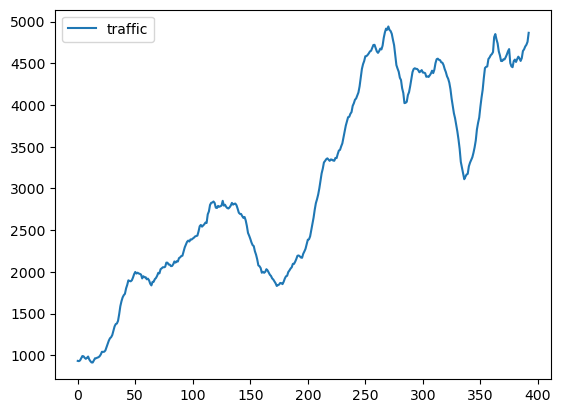

In [6]:
# ARIMA
import pandas as pd
df = pd.read_csv(r'C:\Users\DELL\Downloads\day4_information\day4_information\website_data.csv')
df.plot()

<Axes: >

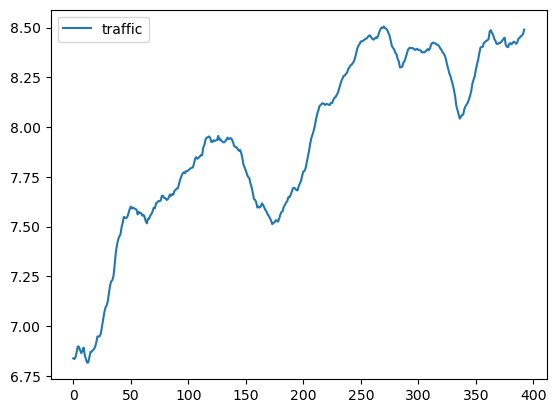

In [7]:
import numpy as np
df = np.log(df) # don't forget to transform the data back when making real predictions
df.plot()
# we use log to reduce the data size

In [8]:
msk = (df.index < len(df)-150)
df_train = df[msk].copy()
df_test = df[~msk].copy()

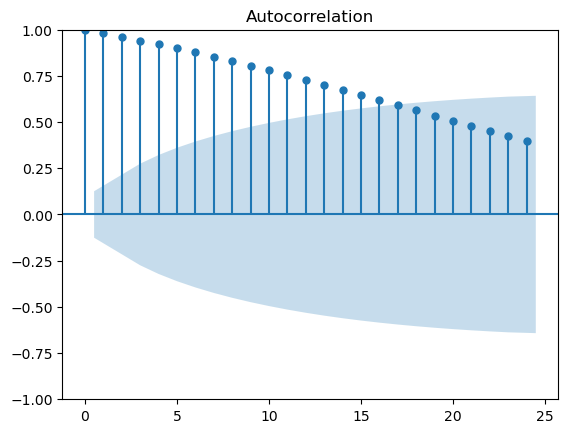

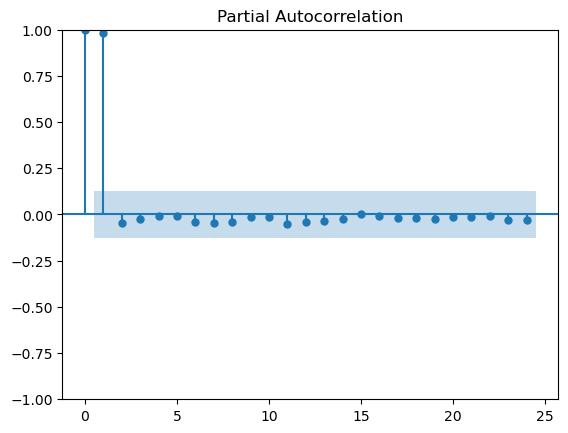

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf_original = plot_acf(df_train)
pacf_original = plot_pacf(df_train)

In [10]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df_train)
print(f'p-value: {adf_test[1]}')

p-value: 0.27779954511673943


<Axes: >

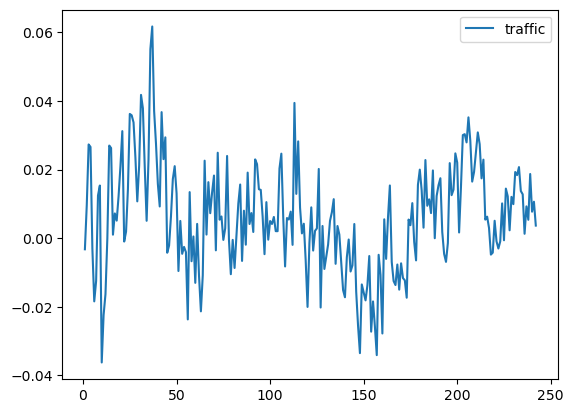

In [11]:
df_train_diff = df_train.diff().dropna()
df_train_diff.plot()
# 1st order differenciation

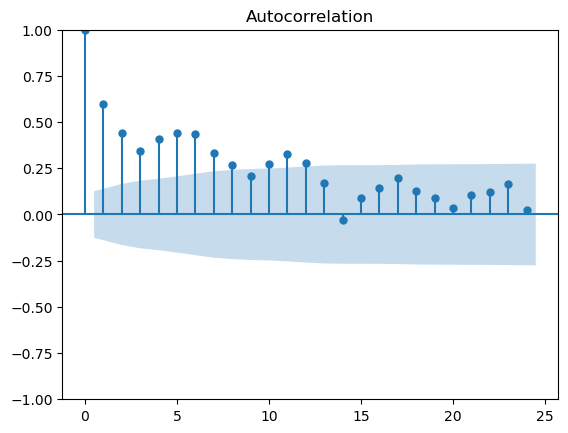

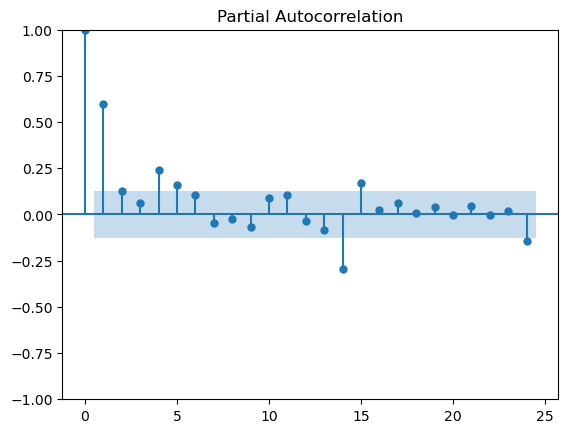

In [12]:
acf_diff = plot_acf(df_train_diff)
pacf_diff = plot_pacf(df_train_diff)
# this decides which component to take either ar i or ma (or all)

In [13]:
adf_test = adfuller(df_train_diff)
print(f'p-value: {adf_test[1]}')

p-value: 0.045656758834983706


In [14]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_train, order=(2,1,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                traffic   No. Observations:                  243
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 714.891
Date:                Mon, 21 Aug 2023   AIC                          -1423.781
Time:                        00:32:03   BIC                          -1413.314
Sample:                             0   HQIC                         -1419.565
                                - 243                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5527      0.060      9.139      0.000       0.434       0.671
ar.L2          0.1501      0.073      2.045      0.041       0.006       0.294
sigma2         0.0002   1.23e-05     12.944      0.0

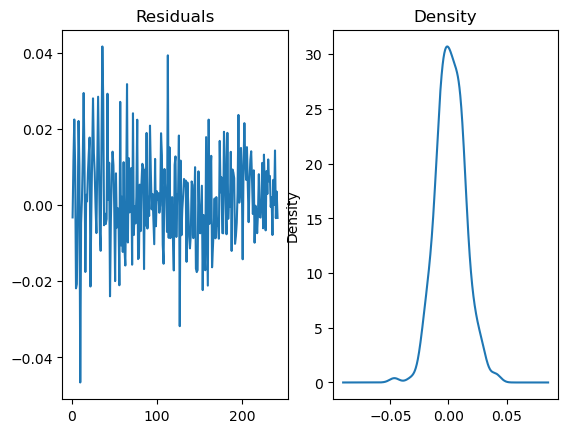

In [15]:
import matplotlib.pyplot as plt
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])

residuals.plot(title='Density', kind='kde', ax=ax[1])
#kde - probability density function
plt.show()

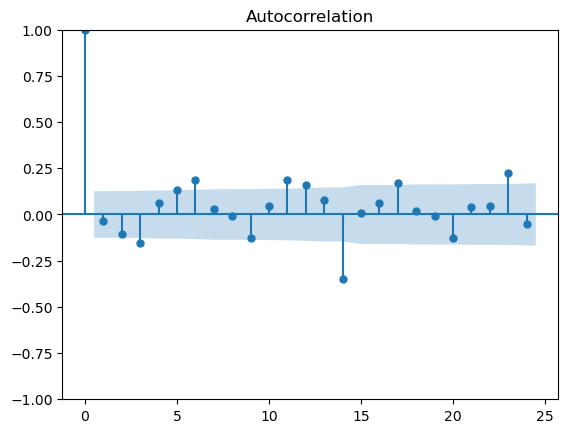

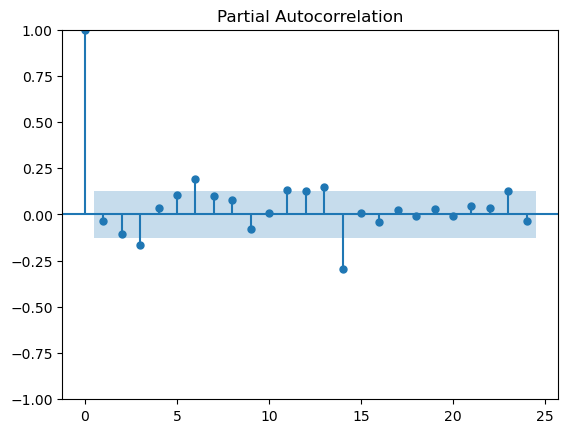

In [16]:
acf_res = plot_acf(residuals)
pacf_res = plot_pacf(residuals)

<Axes: >

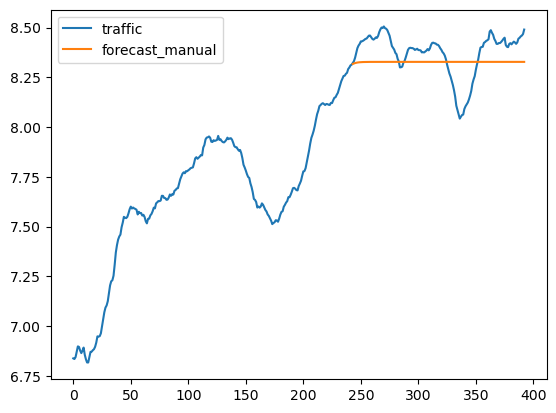

In [17]:
forecast_test = model_fit.forecast(len(df_test))
#length of dataframe must be zero
df['forecast_manual'] = [None]*len(df_train) + list(forecast_test)
df.plot()

In [3]:
#image classification
from matplotlib import pyplot as plt
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)
image_count = len(list(data_dir.glob('/.jpg')))
print(image_count)
print(data_dir.glob('/.jpg'))
flowers = list(data_dir.glob('/'))
plt.imshow(PIL.Image.open(str(flowers[425])))
plt.show()
batch_size = 32
img_height = 180
img_width = 180
train_ds = tf.keras.utils.image_dataset_from_directory(data_dir,
                                                       validation_split=0.2,
                                                       batch_size=batch_size,
                                                       image_size=(img_height, img_width),
                                                       seed=123,
                                                       subset="training")
validation_ds = tf.keras.utils.image_dataset_from_directory(data_dir,
                                                            validation_split=0.2,
                                                            batch_size=batch_size,
                                                            image_size=(img_height, img_width),
                                                            seed=123,
                                                            subset="validation")
from PIL import Image
import numpy as np
for batch in train_ds.take(1):
  print(batch[1].numpy())
#  pil_img = Image.fromarray(batch[0][16].numpy(), mode="L")
#  pil_img.save("./img16.png")
#  Image.show(pil_img)
#  print([arr.numpy() for arr in batch[0][0]])
#16 1 0 3 2; 0 1 2 3 4;
#13 4 14 1 3; dandelion sunflower daisy roses tulip
for batch in train_ds.take(1):
  pil_img = tf.keras.preprocessing.image.array_to_img(batch[0][3].numpy())
  pil_img.save("./img4.png")
AUTOTUNE=tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = validation_ds.cache().prefetch(buffer_size=AUTOTUNE)
class_names = ["dandelion", "roses", "daisy", "sunflower", "tulip"]
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(5)])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
epochs = 15
with tf.device('/device:GPU:0'):
  history = model.fit(train_ds, validation_data=validation_ds, epochs=epochs)
device_name = tf.test.gpu_device_name()
#model.save('./drive/MyDrive/imageclassifier1.h5')
model= keras.models.load_model('./drive/MyDrive/imageclassifier1.h5')
from google.colab import drive
#drive.flush_and_unmount()
drive.mount('/content/drive')
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
score
import numpy as np
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

228813984/228813984 [==============================] - 628s 3us/step


NotImplementedError: Non-relative patterns are unsupported

# day 5

<Axes: title={'center': 'Area'}, ylabel='Frequency'>

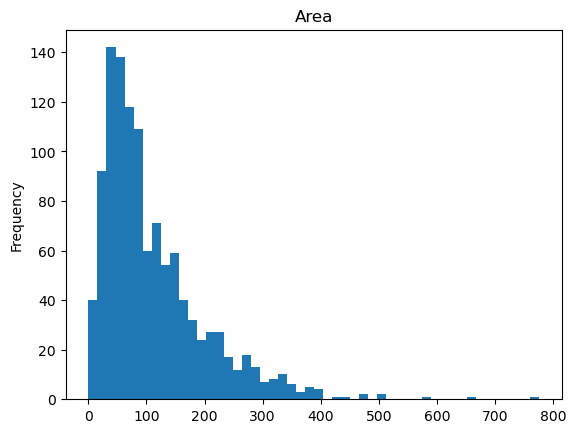

In [18]:
#pandas intro
import pandas as pd

df = pd.read_csv('C:/Users/DELL/Downloads/day5_information/day5_information/workfolder/grain_measurements.csv')

df['Area'].plot(kind='hist', title='Area', bins=50)

In [19]:
import pandas as pd
data = [[10, 200, 60],
        [12, 155, 45],
        [9, 50, -45.],
        [16, 240, 90]] 
         
df = pd.DataFrame(data, index = [1,2,3,4], columns = ['Area', 'Intensity', 'Orientation'])
print(df)


   Area  Intensity  Orientation
1    10        200         60.0
2    12        155         45.0
3     9         50        -45.0
4    16        240         90.0


In [20]:
import pandas as pd
df = pd.read_csv('C:/Users/DELL/Downloads/day5_information/day5_information/workfolder/manual_vs_auto.csv')

print(df.info())  #Prvides an overview of the dataframe. 
print(df.shape)  #How many rows and columns

print(df)  #Shows a lot of stuff but truncated
print(df.head(7))  #Default prints 5 rows from the top
#First default column you see are indices. 
print(df.tail())   #Default prints 5 rows from the bottom

#First line in csv is considered header, even if you don't specify
# so it prints it out every time
#First column is the index and it goes from 0, 1, 2, ....
#Index is not part of the data frame
#INdex is the unique identifier of a row, in our case a specific grain in a specific image
#Any of the other columns can be assigned as index if we know it is a unique identifier. 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    object 
 1   Image       100 non-null    object 
 2   Manual      94 non-null     float64
 3   Manual2     3 non-null      float64
 4   Auto_th_2   100 non-null    int64  
 5   Auto_th_3   100 non-null    int64  
 6   Auto_th_4   100 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 5.6+ KB
None
(100, 7)
   Unnamed: 0     Image  Manual  Manual2  Auto_th_2  Auto_th_3  Auto_th_4
0        Set1    Image1    92.0     93.0         70         87         82
1        Set1    Image2    87.0     83.0         60         85         83
2        Set1    Image3   104.0     98.0         74         99         94
3        Set1    Image4    99.0      NaN         73        101        109
4        Set1    Image5    89.0      NaN         59         90         67
..      

In [24]:
import pandas as pd
df = pd.read_csv('C:/Users/DELL/Downloads/day5_information/day5_information/workfolder/manual_vs_auto.csv')
print(df.index)  #Defines start and stop with step size. Not very exciting with default index
#But can be useful if we assign other column as index. 
df = df.set_index('Image')
print(df.head())
#View all column names.
print(df.columns)   #Image name column disappeared as it is used as index. 

#TO look at all unique entires. In this case, our 3 file names. 
print(df['Unnamed: 0'].unique())  

#If unnamed is bothering you then you can change the name.
df = df.rename(columns = {'Unnamed: 0':'Image_set'})
print(df.columns) 
#Missing data is encoded as NaN so we can work with them in a friendly manner. 
#Let us look at Manual column to see what it has.
print(df["Manual"])  #Shows NAN. We can fill it with something or ignore it or remove the column
#Let us look at manipulating data in our next video. 

#For now let us finish by looking at a couple more useful functions. 
#Pandas automatically recognizes correct data types.

print(df.dtypes) 
#Similarly multiple column names can be changed at once. 
df = df.rename(columns = {'equivalent_diameter':'Diameter(um)', 
                          'Area':'Area(sq. um)',
                          'orientation':'orientation (deg)',
                          'MajorAxisLength':'Length (um)',
                          'MinorAxisLength':'Width (um)',
                          'Perimeter':'Perimeter (um)'})
print(df.dtypes)


print(df.describe())  #Gives statistical summary of each column. 

RangeIndex(start=0, stop=100, step=1)
       Unnamed: 0  Manual  Manual2  Auto_th_2  Auto_th_3  Auto_th_4
Image                                                              
Image1       Set1    92.0     93.0         70         87         82
Image2       Set1    87.0     83.0         60         85         83
Image3       Set1   104.0     98.0         74         99         94
Image4       Set1    99.0      NaN         73        101        109
Image5       Set1    89.0      NaN         59         90         67
Index(['Unnamed: 0', 'Manual', 'Manual2', 'Auto_th_2', 'Auto_th_3',
       'Auto_th_4'],
      dtype='object')
['Set1' 'Set2' 'Set3' 'Set4']
Index(['Image_set', 'Manual', 'Manual2', 'Auto_th_2', 'Auto_th_3',
       'Auto_th_4'],
      dtype='object')
Image
Image1       92.0
Image2       87.0
Image3      104.0
Image4       99.0
Image5       89.0
            ...  
Image96     106.0
Image97      80.0
Image98      92.0
Image99     116.0
Image100     99.0
Name: Manual, Length: 100, dtyp